# Network Science Analysis of paper “Marvel Universe looks almost like a real social network“


This notebook aims to replicate some of the results presented in the paper ***Marvel Universe looks almost like a real social network***. The paper explores the collaboration network within the Marvel Universe, where characters are connected if they appear together in a comic book. This network shares many traits with real-life collaboration networks, such as those of movie actors or scientists, despite not being a random network and lacking some characteristics of actual collaboration networks. This examination of the Marvel Universe, an artificial construct aiming to mimic reality.

This paper extends the scope beyond the area of Network Science, so part of it will be excluded.

*Dataset source*: http://www.oakland.edu/˜grossman/erdoshp.html

*Paper citation*: R. Alberich, J. Miro-Julia, and F. Rossello, "Marvel Universe looks almost like a real social network," 2002, arXiv:cond-mat/0202174.

***Authors***:

Manuel Alejandro Aponte Ramirez

Ivan Alejandro Cruz Tole

Martin Eduardo Espitia Nery

In [1]:
import pandas as pd

In [2]:
def network_file_to_df(path:str, col_left:str ,col_right:str, sep=':' ):
    """
    Read data from a network file and return a DataFrame.

    Parameters:
    - path (str): The path to the network file.
    - col_left (str): The name for the column containing the left-side values.
    - col_right (str): The name for the column containing the right-side values.
    - sep (str, optional): The separator used in the network file. Default is ':'.

    Returns:
    - pandas.DataFrame: A DataFrame containing the data read from the network file.
    """
    data = []

    with open(path, 'r', encoding="utf8") as file:
        for line in file:
            try:
                index, item = line.strip().split(sep, maxsplit=1)
                data.append(
                    {col_left:index, col_right:item.strip()}
                    )  
            except:
                print('Error:',line)
    
    return pd.DataFrame(data)

### Read network dataset

Next, three datasets will be loaded. The information for each of these is as follows:


**Characters (Node)**

*vertex*: Vertex identification

*character*: Character's name

**Comics (Node)**

*vertex*: Vertex identification

*character*: Book's name

**Edges (Edge)**

*character*: Character's vertex identification

*comic*: Comics in which the character appears.

In [3]:
characters_df = network_file_to_df('data/characters.txt','vertex','character')
characters_df['index'] = characters_df.vertex.str.extract('(\d+)').astype(int)
characters_df.head()

,vertex,character,index
0,Vertex 1,24-HOUR MAN/EMMANUEL,1
1,Vertex 2,3-D MAN/CHARLES CHANDLER & HAROLD CHANDLER,2
2,Vertex 3,4-D MAN/MERCURIO,3
3,Vertex 4,8-BALL/,4
4,Vertex 5,A,5


In [4]:
len(characters_df)

6486

In [5]:
comic_df = network_file_to_df('data/comics.txt','vertex','comic')
comic_df['index'] = comic_df.vertex.str.extract('(\d+)').astype(int)
comic_df.head()

,vertex,comic,index
0,Vertex 6487,AA2 35,6487
1,Vertex 6488,M/PRM 35,6488
2,Vertex 6489,M/PRM 36,6489
3,Vertex 6490,M/PRM 37,6490
4,Vertex 6491,WI? 9,6491


In [6]:
len(comic_df)

12942

In [7]:
edges_raw_df = network_file_to_df('data/edges.txt','character','comic', sep=" ")
edges_raw_df.head()

,character,comic
0,1,6487
1,2,6488 6489 6490 6491 6492 6493 6494 6495 6496
2,3,6497 6498 6499 6500 6501 6502 6503 6504 6505
3,4,6506 6507 6508
4,5,6509 6510 6511


In [8]:
len(edges_raw_df)

11090

### Data wrangling

* Normalize relationships between characters and comics

In [9]:
edges_raw_df['comic'] = edges_raw_df['comic'].apply(lambda x: x.split())
edges_df = edges_raw_df.explode('comic')
edges_df.reset_index(drop=True, inplace=True)

In [10]:
edges_df.head()

,character,comic
0,1,6487
1,2,6488
2,2,6489
3,2,6490
4,2,6491


In [11]:
len(edges_df)

96662

The previous findings confirm the following original paper results:

*"this database collects over 96 000 appearances by more than 6 500 characters in
about 13 000 comic books"*

In [12]:
table_1_df = pd.DataFrame(
    [{"title": 'Number of characters', 'result': len(characters_df)},
    {"title": 'Number of books', 'result': len(comic_df)},
    {"title": 'Mean books per character', 'result': f"{edges_df.groupby('character').count().mean().values[0]:.2f}"},
    {"title": 'Mean characters per book:', 'result': f"{edges_df.groupby('comic').count().mean().values[0]:.2f}"}
    ]
)
table_1_df

,title,result
0,Number of characters,6486
1,Number of books,12942
2,Mean books per character,14.90
3,Mean characters per book:,7.47


The previous table replicates the original paper table; *Table 1: Basic data on appearances of characters in comic books.*

### Replicating section 3.1 The bipartite graph

* Looking for the most popular character

In [13]:
most_popular_character = edges_df.groupby('character').count().reset_index().sort_values('comic', ascending=False).head(1)
most_popular_character

,character,comic
4786,5306,1625


In [14]:
characters_df[characters_df["index"] == int(most_popular_character['character'].values[0])]

,vertex,character,index
5305,Vertex 5306,SPIDER-MAN/PETER PARKER,5306


The previous results confirm the result:
*The number of appearances spans from 1 to 1 625: this greatest value corresponds to Spider-Man*

* Creating distribution plots in the bipartite graph

In [15]:
freq_characters_by_book = edges_df.groupby('comic').count().value_counts(normalize = True).reset_index()
freq_characters_by_book.columns = ['number_characters_per_book','frequency_of_books']
freq_characters_by_book.head()

,number_characters_per_book,frequency_of_books
0,1,0.119688
1,3,0.084917
2,5,0.084454
3,4,0.084299
4,2,0.081286


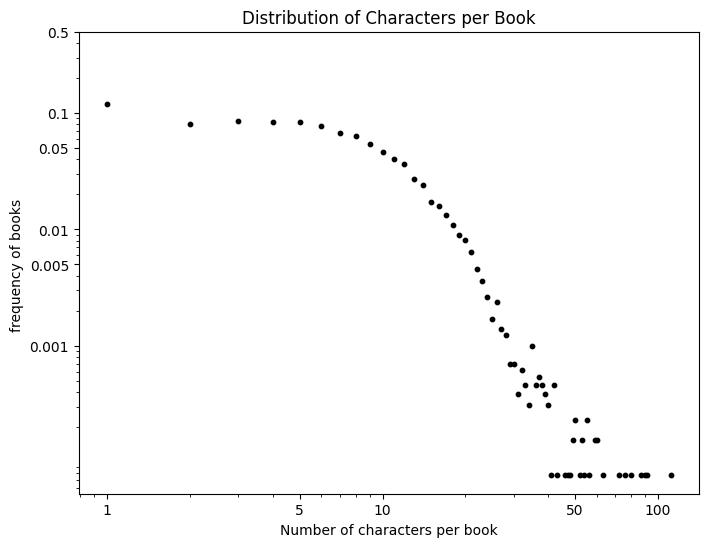

In [34]:
import matplotlib.pyplot as plt


# Create the scatter plot
plt.figure(figsize=[8, 6])
plt.scatter(freq_characters_by_book['number_characters_per_book'], freq_characters_by_book['frequency_of_books'], edgecolor=None, c='black',s=10)
plt.xlabel('Number of characters per book')
plt.ylabel('frequency of books ')
# Applying log scale
plt.xscale('log')
plt.yscale('log')

# Set specific tick marks
x_ticks = [1, 5, 10, 50, 100]
y_ticks = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)

plt.title('Distribution of Characters per Book')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Most books contain 10 or fewer characters. Beyond this, the density of characters per book decays, with around 50 characters per book being a less common occurrence. It's rare for a comic book to feature more than 50 characters.

In [17]:
freq_characters_by_character = edges_df.groupby('character').count().value_counts(normalize = True).reset_index()
freq_characters_by_character.columns = ['number_books_per_character','frequency_of_characters']
freq_characters_by_character.head()

,number_books_per_character,frequency_of_characters
0,1,0.284150
1,2,0.159420
2,3,0.100678
3,4,0.061980
4,5,0.053808


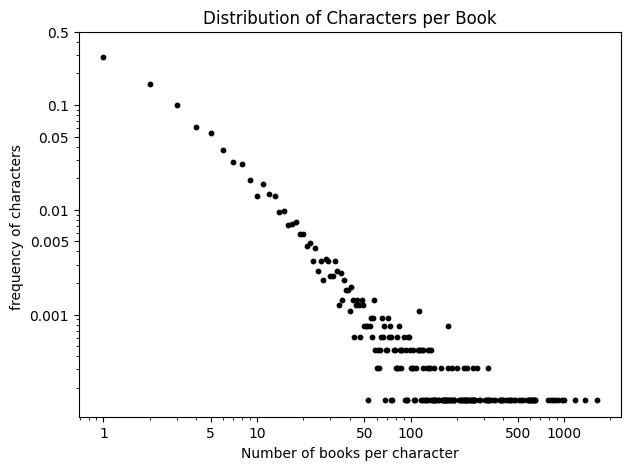

In [36]:
import matplotlib.pyplot as plt


# Create the scatter plot
plt.figure(figsize=[7, 5])
plt.scatter(freq_characters_by_character['number_books_per_character'], freq_characters_by_character['frequency_of_characters'],  edgecolor=None, c='black',s=10)
plt.xlabel('Number of books per character')
plt.ylabel('frequency of characters ')
# Applying log scale
plt.xscale('log')
plt.yscale('log')

# Set specific tick marks
x_ticks = [1, 5, 10, 50, 100,500,1000]
y_ticks = [0.001, 0.005, 0.01, 0.05, 0.1,0.5]
plt.xticks(x_ticks, labels=x_ticks)
plt.yticks(y_ticks, labels=y_ticks)

plt.title('Distribution of Characters per Book')
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


It's extremely common for a character to appear exclusively just once in a comic book. However, some other characters may appear across many different books, showcasing a wide range of presence in Marvel Universe.

***Finding***: The previous plots show a high similarity between the figures 1 and 2 of the paper.

### Creating the collaboration network 


In [19]:
# all collaborations in the Marvel Universe history,
merged_df = pd.merge(edges_df, edges_df, on='comic')
merged_df['relation_key'] = merged_df.apply(lambda row: str(sorted((row['character_x'], row['character_y']))), axis=1)
merged_df['relation_key'] = merged_df.apply(lambda row: str(sorted((row['character_x'], row['character_y']))), axis=1)
filtered_df = merged_df[merged_df['character_x'] != merged_df['character_y']]
unique_df = filtered_df.drop_duplicates(subset=['relation_key', 'comic'])
unique_df

,character_x,comic,character_y,relation_key
1,1,6487,1999,"['1', '1999']"
2,1,6487,6459,"['1', '6459']"
3,1,6487,6463,"['1', '6463']"
4,1,6487,6464,"['1', '6464']"
5,1,6487,6471,"['1', '6471']"
...,...,...,...,...
1236181,6481,18709,6484,"['6481', '6484']"
1236184,6482,15336,6485,"['6482', '6485']"
1236185,6482,15336,6486,"['6482', '6486']"
1236189,6483,18709,6484,"['6483', '6484']"


In [83]:
# Number of link
network_collaboration = unique_df.groupby('relation_key').first().reset_index()
network_collaboration

,relation_key,character_x,comic,character_y
0,"['1', '1999']",1,6487,1999
1,"['1', '6459']",1,6487,6459
2,"['1', '6463']",1,6487,6463
3,"['1', '6464']",1,6487,6464
4,"['1', '6471']",1,6487,6471
...,...,...,...,...
168262,"['983', '984']",983,13798,984
168263,"['983', '985']",983,13798,985
168264,"['984', '985']",984,13798,985
168265,"['988', '989']",988,6545,989


Upon reviewing the datasets "unique_df" and "network_collaboration," it's clear that "unique_df" includes all collaborations in the Marvel Universe history. On the other hand, "network_collaboration" focuses on 168,267 links showing characters who have collaborated in comic books.

### Network Science metrics

In [84]:
network_collaboration['character_x'] = network_collaboration['character_x'].astype(int)
network_collaboration['character_y'] = network_collaboration['character_y'].astype(int)

In [85]:
network_collaboration = network_collaboration.merge(characters_df, left_on='character_x', right_on='index', how='left')
network_collaboration['character_x'] = network_collaboration['character']
network_collaboration = network_collaboration.drop(columns= ['index','character','vertex'])

network_collaboration = network_collaboration.merge(characters_df, left_on='character_y', right_on='index', how='left')
network_collaboration['character_y'] = network_collaboration['character']
network_collaboration = network_collaboration.drop(columns= ['index','character','vertex'])

In [93]:
network_collaboration.character_x = network_collaboration.character_x.astype("string")  
network_collaboration.character_y = network_collaboration.character_y.astype("string")    

In [95]:
import networkx as nx

G = nx.from_pandas_edgelist(network_collaboration, 'character_x', 'character_y')

In [96]:
mean_partners_per_character = sum(dict(G.degree()).values()) / G.number_of_nodes()
mean_partners_per_character

52.04608722548716

A character as in average 52 parters, which is a indicator a high degree of collaboration

In [97]:
giant_component = max(nx.connected_components(G), key=len)
size_of_giant_component = len(giant_component)
size_of_giant_component

6448

Being 6449 the size_of_giant_component then the network has a high level of integrity.

In [81]:
giant_subgraph = G.subgraph(giant_component)

In [25]:

# Calculate the average shortest path length for the largest connected component of the subgraph
avg_shortest_path_length = nx.average_shortest_path_length(giant_subgraph)
print("Average shortest path length in the largest connected component of the subgraph:", avg_shortest_path_length)


Average shortest path length in the largest connected component of the subgraph: 2.6373681821907105


In [26]:
maximum_distance = nx.diameter(giant_subgraph)
maximum_distance

5

In [27]:
nx.average_clustering(giant_subgraph)

0.7758578325826586